In [5]:
# Importing KNeighborsClassifier for kNN algorithm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# Load the dataset from the CSV file
data = pd.read_csv("Downloads/ML_Activity/diabetes.csv")
# Display the dataset 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


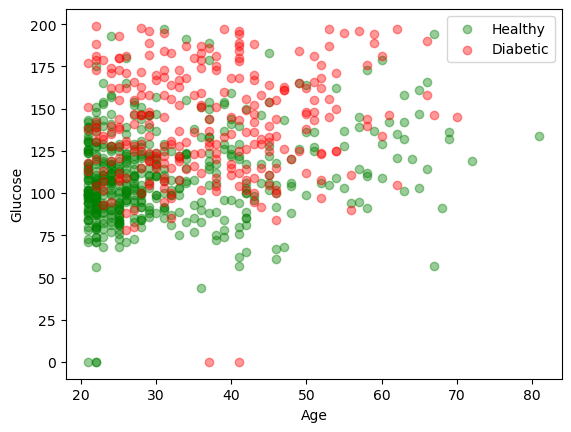

In [9]:
# Outcome 0 = Healthy
# Outcome 1 = Diabetic
# Create two dataframes, one for healthy people (Outcome = 0) and one for diabetic patients (Outcome = 1)
healthy_people = data[data.Outcome == 0]
diabetic_patient = data[data.Outcome == 1]
# Scatter plot showing glucose levels vs age for healthy and diabetic patients
plt.scatter(healthy_people.Age, healthy_people.Glucose, color="green", label="Healthy", alpha=0.4)
plt.scatter(diabetic_patient.Age, diabetic_patient.Glucose, color="red", label="Diabetic", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [11]:
# Prepare the data for training the model
# 'y' is the dependent variable (Outcome: 0 = Healthy, 1 = Diabetic)
y = data.Outcome.values

# 'x_before' is the independent variables (removes 'Outcome' column)
x_before = data.drop(["Outcome"], axis=1)

# Normalize the features to the range [0, 1] to avoid large values overpowering smaller ones
# This helps prevent the kNN algorithm from being biased due to varying scales of features
x = (x_before - np.min(x_before, axis=0)) / (np.max(x_before, axis=0) - np.min(x_before, axis=0))

# Display the data before and after normalization for comparison
print("Data before normalization:\n")
print(x_before)
print("\n\nData after normalization (ready for training):\n")
print(x)

Data before normalization:

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1        

In [13]:
# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN model using the training data
knn.fit(x_train, y_train)

# Evaluate the model using the test data and print the accuracy score
prediction = knn.predict(x_test)
print("Accuracy for k=3 on test data: ", knn.score(x_test, y_test))

Accuracy for k=3 on test data:  0.7857142857142857


In [17]:
# Now, let's try different values of k to determine the best one

i = 1
for k in range(1, 11):  # Trying k values from 1 to 10
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(x_train, y_train)
    print(f"Accuracy for k={k}: {knn_new.score(x_test, y_test) * 100:.2f}%")
    i += 1

Accuracy for k=1: 69.48%
Accuracy for k=2: 74.03%
Accuracy for k=3: 78.57%
Accuracy for k=4: 75.97%
Accuracy for k=5: 79.87%
Accuracy for k=6: 79.22%
Accuracy for k=7: 81.17%
Accuracy for k=8: 79.22%
Accuracy for k=9: 78.57%
Accuracy for k=10: 79.22%


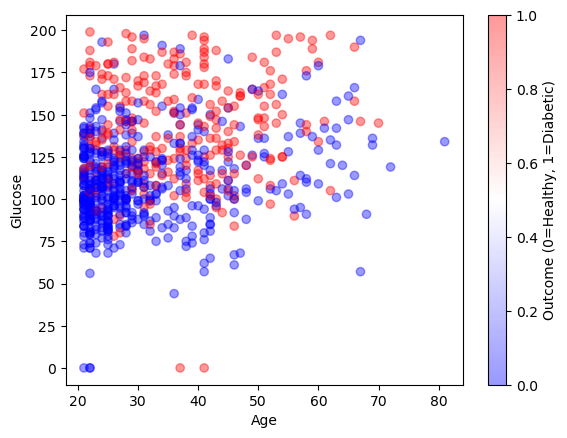

KNN Cross-Validation Accuracy: 0.74
KNN Accuracy on Test Data: 0.77
Random Forest Accuracy on Test Data: 0.77
SVM Accuracy on Test Data: 0.78

KNN Accuracy: 0.77
Random Forest Accuracy: 0.77
SVM Accuracy: 0.78
Accuracy for k=1: 70.78%
Accuracy for k=2: 70.78%
Accuracy for k=3: 70.78%
Accuracy for k=4: 71.43%
Accuracy for k=5: 77.27%
Accuracy for k=6: 79.22%
Accuracy for k=7: 78.57%
Accuracy for k=8: 79.22%
Accuracy for k=9: 76.62%
Accuracy for k=10: 77.92%
Accuracy for k=11: 76.62%
Accuracy for k=12: 77.92%
Accuracy for k=13: 79.22%
Accuracy for k=14: 78.57%
Accuracy for k=15: 79.22%
Accuracy for k=16: 77.27%
Accuracy for k=17: 78.57%
Accuracy for k=18: 77.92%
Accuracy for k=19: 80.52%
Accuracy for k=20: 79.22%


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv("Downloads/ML_Activity/diabetes.csv")

# Add more features if available or derived features (for example, BMI squared)
data['BMI_squared'] = data['BMI'] ** 2

# Visualizing relationships
plt.scatter(data.Age, data.Glucose, c=data.Outcome, cmap='bwr', alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.colorbar(label='Outcome (0=Healthy, 1=Diabetic)')
plt.show()

# Separate features and target
y = data.Outcome
x_before = data.drop(["Outcome"], axis=1)

# Normalize the features using StandardScaler (zero mean, unit variance)
scaler = StandardScaler()
x = scaler.fit_transform(x_before)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize KNN with hyperparameter tuning (weights='distance' for better performance)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the KNN model
knn.fit(x_train, y_train)

# Evaluate using cross-validation (for more reliable results)
cv_score = cross_val_score(knn, x, y, cv=5)
print(f"KNN Cross-Validation Accuracy: {np.mean(cv_score):.2f}")

# Test accuracy on the test set
knn_accuracy = knn.score(x_test, y_test)
print(f"KNN Accuracy on Test Data: {knn_accuracy:.2f}")

# Try Random Forest as an alternative model (can also add hyperparameter tuning)
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train, y_train)
rf_accuracy = rf_model.score(x_test, y_test)
print(f"Random Forest Accuracy on Test Data: {rf_accuracy:.2f}")

# Try Support Vector Machine (SVM)
svm_model = SVC(random_state=1)
svm_model.fit(x_train, y_train)
svm_accuracy = svm_model.score(x_test, y_test)
print(f"SVM Accuracy on Test Data: {svm_accuracy:.2f}")

# Compare models
print(f"\nKNN Accuracy: {knn_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# If you want to test different k values for KNN, you can loop again
for k in range(1, 21):  # Trying k values from 1 to 20
    knn_new = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_new.fit(x_train, y_train)
    print(f"Accuracy for k={k}: {knn_new.score(x_test, y_test) * 100:.2f}%")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


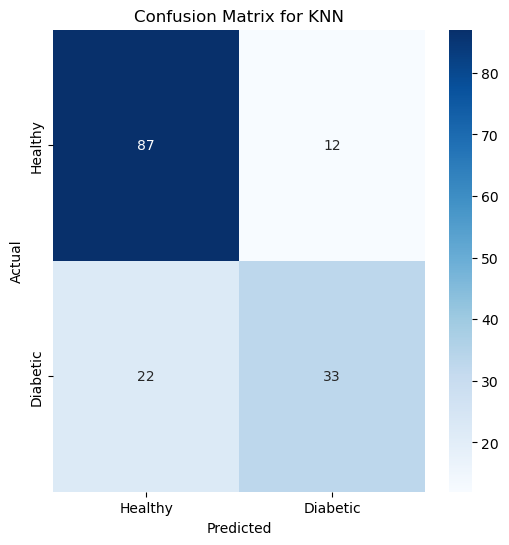

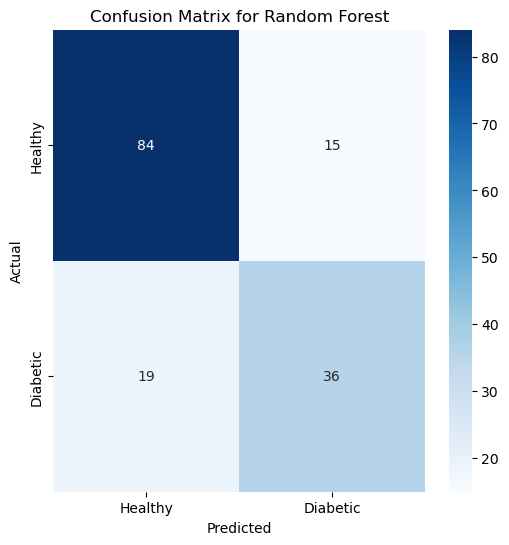

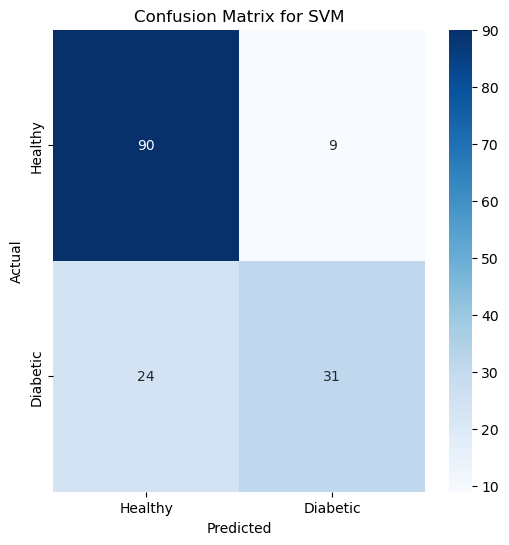

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.7

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the dataset
data = pd.read_csv("Downloads/ML_Activity/diabetes.csv")

# Add more features (polynomial and interaction terms as examples)
data['BMI_squared'] = data['BMI'] ** 2
data['Age_Glucose_interaction'] = data['Age'] * data['Glucose']

# Separate features and target variable
y = data.Outcome
x_before = data.drop(["Outcome"], axis=1)

# Normalize the features using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x_before)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# KNN model initialization
knn = KNeighborsClassifier(weights='distance')

# Hyperparameter tuning using GridSearchCV for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Trying values of k from 1 to 20
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train, y_train)

# Best KNN Model found through GridSearchCV
best_knn = grid_search_knn.best_estimator_

# Random Forest model initialization
rf_model = RandomForestClassifier(random_state=1)

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum samples required to be at a leaf node
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train, y_train)

# Best Random Forest Model found through GridSearchCV
best_rf = grid_search_rf.best_estimator_

# SVM model initialization
svm_model = SVC(random_state=1)

# Hyperparameter tuning for SVM using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or Radial Basis Function kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_svm.fit(x_train, y_train)

# Best SVM Model found through GridSearchCV
best_svm = grid_search_svm.best_estimator_

# Evaluate models and get predictions
y_pred_knn = best_knn.predict(x_test)
y_pred_rf = best_rf.predict(x_test)
y_pred_svm = best_svm.predict(x_test)

# Plot confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Diabetic"], yticklabels=["Healthy", "Diabetic"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Diabetic"], yticklabels=["Healthy", "Diabetic"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Diabetic"], yticklabels=["Healthy", "Diabetic"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification reports for all models
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))
